In [1]:
import pandas as pd
import numpy as np

import os
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import string

In [2]:
from sklearn.metrics import classification_report

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fabricio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load data true
dataTRUE = "Data/size_normalized_texts/true/"

list = os.listdir(dataTRUE)
number_files_true = len(list)

In [6]:
# Load data Fake
dataFAKE = "Data/size_normalized_texts/fake/"

list = os.listdir(dataTRUE)
number_files_fake = len(list)

In [7]:
TEXT = []
LABEL = []

In [8]:
# Load data true
for i in range(number_files_true):
    title = list[i]
    LABEL.append(1)
    with open(dataTRUE + title,'r') as reader:

        doc = reader.read()
        doc.lower()
        doc.split()
        reader.close
        TEXT.append(doc)

In [9]:
# Load data fake
for i in range(number_files_fake):
    title = list[i]
    LABEL.append(0)
    with open(dataFAKE + title,'r') as reader:

        doc = reader.read()
        doc.lower()
        doc.split()
        reader.close
        TEXT.append(doc)

In [10]:
print(f"True {number_files_true}")
print(f"Fake {number_files_fake}")

True 3600
Fake 3600


In [11]:
assert len(TEXT) == len(LABEL)

In [12]:
print(f"Label {len(LABEL)} - TEXT {len(TEXT)}")

Label 7200 - TEXT 7200


In [13]:
def vectors_and_df(text, label):
    """
    creates vectors for the text files and returns dataframe with articles as word vectors 
    """
    
    cv = TfidfVectorizer()
    cv.fit(text)
    corpus_vecs = cv.transform(text)
    
    return pd.DataFrame(corpus_vecs.todense(), index=label, 
                        columns=cv.get_feature_names()), cv

In [14]:
# Store results into dataframe, keep cv for later prediction
df, cv = vectors_and_df(TEXT, LABEL)

/home/fabricio/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
X = df
y = df.index

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [17]:
model = LogisticRegression(max_iter=300)
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=300)

In [18]:
pred = model.predict(Xtest)
pred

array([1, 1, 0, ..., 0, 0, 1])

In [19]:
# Create the predictions for Y training data
preds = model.predict(Xtest)

print(model.score(Xtrain, ytrain))
print(f"Acuracia {model.score(Xtest, ytest)}")

0.964484126984127
Acuracia 0.8949074074074074


In [20]:
print("Accuracy:",round(metrics.accuracy_score(ytest, preds)*100, 2),'%')
print("Precision:",round(metrics.precision_score(ytest, preds)*100, 2), '%')

Accuracy: 89.49 %
Precision: 90.72 %


In [21]:
matrix = confusion_matrix(ytest, preds)
matrix

array([[975,  98],
       [129, 958]])

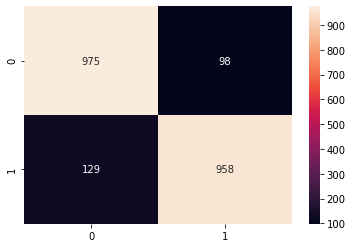

In [22]:
sns.heatmap(matrix, annot=True, fmt="d")

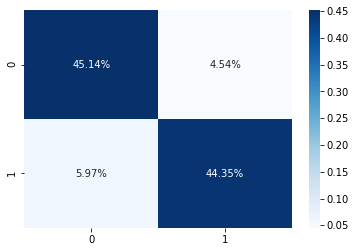

In [23]:
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

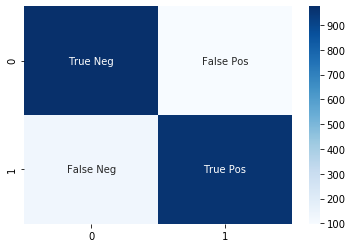

In [24]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

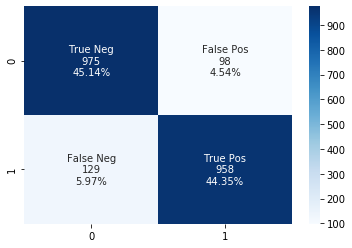

In [25]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [26]:
def predict(new_text):
    
    """
    Takes the pre-trained model pipeline and predicts new artist based on unseen text.
    
    Parameters
    ----------
    model : Trained scikit-learn model pipeline.
    new_text : str
    
    Returns
    ---------
    prediction : str
    
    """
    article = [new_text]
    # transform song into vector matrix
    new_article_vecs = cv.transform(article)
    ynew = new_article_vecs.todense()

    prediction = model.predict(ynew)
    
    return prediction

In [27]:
TXT_UOL = """O bolsonarismo tem um novo herói: Daniel Silveira, o deputado antissistema com quem Jair Bolsonaro abriu uma nova frente contra o Poder Judiciário ao conceder indulto à sua condenação por atos antidemocráticos.Quem é este ex-policial de 39 anos, até então um controverso membro do "baixo clero" parlamentar, que passou a ser recebido com honras no Palácio do Planalto após ser condenado em abril a mais de oito anos de prisão?Indisciplinado, fervoroso crítico da esquerda e do Supremo Tribunal Federal (STF), Silveira começou a ser conhecido em 2018.Alto, musculoso e de temperamento irritadiço, deixou a Polícia Militar do Rio de Janeiro para se candidatar a deputado e despertou indignação quando quebrou uma placa em homenagem à vereadora e ativista Marielle Franco, cujo assassinato provocou uma onda de condenações internacionais.Ainda assim, foi eleito com 31 mil votos pelo Partido Social Liberal (PSB), na mesma onda antissistema que levou Bolsonaro à Presidência.Sem acesso ao núcleo mais próximo do presidente de extrema direita, Silveira, que costuma usar um broche de metal com duas pistolas na lapela, passou a se apresentar como um dos parlamentares mais alinhados às pautas ideológicas bolsonaristas.Seu caso junto ao STF começou em fevereiro de 2021, um dia depois do juiz Alexandre de Moraes determinar sua prisão por aparecer em um vídeo ameaçando a corte.O deputado "youtuber" declarou seu desejo de que "o povo entre no STF e agarre o Alexandre de Moraes pelo colarinho dele e sacuda a cabeça de ovo dele e o jogue numa lixeira".Além disso, ele defendeu o AI-5, um dos atos mais repressivos da última ditadura militar (1964-1985), que anulou várias garantias constitucionais.Enquanto seu julgamento avançava, Bolsonaro, que expressou "dor no coração" ao saber de sua prisão, demostrou disposição em protegê-lo e quando o STF o condenou em 20 de abril a oito anos e nove meses de prisão, concedeu-lhe um indulto como "garantia de liberdade".Silveira já tinha virado notícia semanas antes, ao pernoitar no Congresso para evitar que a polícia lhe colocasse uma tornozeleira eletrônica."Eu quero ver até onde vai a petulância de alguém para, de fato, romper com os outros dois Poderes, porque aqui o plenário é inviolável", disse, em tom de desafio.O deputado já tinha histórico de indisciplinado: como policial acumulou 60 sanções por insubordinação e má conduta em seis anos, segundo a imprensa.Após o indulto, apoiadores e aliados de Bolsonaro tentaram transformar o deputado em um mártir da liberdade de expressão. O deputado federal Eduardo Bolsonaro, filho do presidente, comparou a condenação a uma "injustiça" vivida por Jesus Cristo."No passado, se anistiavam bandidos. Agora, anistiamos inocentes", declarou o presidente no ato no Palácio do Planalto no qual Silveira, sorridente, tirou uma foto segurando uma cópia emoldurada do decreto de graça como se fosse um troféu.O reconhecimento também chegou à Câmara dos Deputados, onde foi nomeado membro da Comissão de Constituição e Justiça (CCJ), a mais importante da Casa, à espera de que se esclareça se o indulto também evita a perda de mandato.Silveira não é uma exceção no Parlamento: entre 513 deputados, ao menos uma centena é alvo de investigações, segundo dados do site Congresso em Foco.Sua popularidade também foi notada nas ruas no domingo, quando dezenas de apoiadores o aplaudiram durante uma manifestação bolsonarista no Rio de Janeiro."Silveira tem uma importância mais simbólica do que real no bolsonarismo", disse à AFP André Cesar, analista da consultoria Hold.Nesta terça, Moraes lhe impôs multa de 405.000 reais por descumprir em 27 ocasiões diferentes as medidas cautelares, em sua grande maioria ao desativar completamente a tornozeleira eletrônica que devia usar "por falta de bateria".Com o indulto, Bolsonaro aumentou as tensões com o STF, que abriu várias investigações contra ele.O presidente acusou repetidamente seus ministros - sem provas - de trabalharem pelo retorno da esquerda, promovendo fraudes nas eleições por meio das urnas eletrônicas.O STF por enquanto não se pronunciou sobre as denúncias de vários partidos contra o indulto presidencial.Para César, o indulto é "uma jogada de marketing" para a base "mais ideológica" de Bolsonaro, cinco meses antes de ele tentar a reeleição."É uma oportunidade de desviar a atenção dos problemas reais do país", disse o cientista político Paulo Calmon, da Universidade de Brasília."Antes era a pandemia; agora, uma economia desastrosa", com inflação galopante e pífia previsão de crescimento de 1,1% em 2022, acrescentou."""

In [28]:
txt_uol = """O ex-juiz Sergio Moro (União Brasil) disse nesta sexta-feira, 6, que o futuro político dele ainda está indefinido e que "pode ser" que ele concorra a algum mandato eletivo nas eleições 2022. A fala foi feita durante evento organizado pela Amcham em parceria com o Brazil-U.S. Business Council (BUSBC).O ex-juiz reforçou que está à disposição do União Brasil para buscar solução ao País diante da polarização entre "dois extremos": o presidente Jair Bolsonaro (PL) e o ex-presidente Luiz Inácio Lula da Silva (PT). "Em que posição eu vou jogar nessa construção é algo que está sendo definido, posso eventualmente concorrer a um cargo no Congresso ou alguma outra coisa", disse durante o evento.Moro deixou o Podemos, partido pelo qual era pré-candidato ao Planalto, e se filiou ao União Brasil. A nova legenda do ex-juiz desembarcou do projeto da terceira via para lançar chapa pura na corrida presidencial. O pré-candidato pela legenda é o deputado federal e presidente da sigla, Luciano Bivar.Parlamentares do União Brasil apostam no nome de Moro na disputa à Câmara por acreditarem que o ex-juiz seria um puxador de votos, o que aumentaria o número de eleitos e, consequentemente, a participação da legenda nos fundos partidário e eleitoral. Hoje, a sigla conta com quase R$ 1 bilhão em verbas do fundo partidário e do fundo eleitoral para as disputas eleitorais deste ano.Sergio Moro disse que a "falta de desprendimento" de políticos da terceira via dificulta a construção do centro democrático.Moro fez referência ao fato de pré-candidatos não abrirem mão da cabeça de chapa na disputa ao Planalto. Na negociação entre MDB, PSDB e Cidadania, Simone Tebet (MDB) e João Doria (PSDB) resistem à possibilidade de serem candidatos à vice-Presidência, mas enfrentam resistências dentro dos próprios partidos. As três siglas estabeleceram dia 18 de maio como prazo final para anunciar o desfecho das negociações."Coloca em cheque a própria legitimidade de alguns destes personagens que estão aparecendo como representantes da terceira via", explicou. O ex-juiz reforçou que está "à disposição do União Brasil para buscar solução para o País" diante da polarização entre "dois extremos": o presidente Jair Bolsonaro (PL) e o ex-presidente Luiz Inácio Lula da Silva (PT). "Em que posição eu vou jogar nessa construção é algo que está sendo definido, posso eventualmente concorrer a um cargo no Congresso ou alguma outra coisa", disse durante o evento."""

In [35]:
predict(txt_uol)

/home/fabricio/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/fabricio/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([1])

In [30]:
predict(TXT_UOL)

/home/fabricio/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/fabricio/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([1])

In [31]:
predict_model = model.predict(Xtrain)

In [32]:
print(classification_report(ytrain, predict_model))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2527
           1       0.96      0.97      0.96      2513

    accuracy                           0.96      5040
   macro avg       0.96      0.96      0.96      5040
weighted avg       0.96      0.96      0.96      5040



#### Salvando modelo

In [33]:
pickle.dump(cv, open('tfidfvect_new.pkl', 'wb'))

In [34]:
pickle.dump(model, open('model_new.pkl', 'wb'))

In [36]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
dtc = DecisionTreeClassifier()


In [61]:
dtc.fit(Xtrain, ytrain)


DecisionTreeClassifier()

In [62]:
y_pred_dtc = dtc.predict(Xtest)
y_pred_dtc 

array([1, 0, 0, ..., 1, 0, 1])

In [63]:
def predictDecTreeClass(new_text):
    article = [new_text]
    # transform song into vector matrix
    new_article_vecs = cv.transform(article)
    ynew = new_article_vecs.todense()

    prediction = dtc.predict(ynew)
    
    return prediction

In [64]:
predictDecTreeClass(TXT_UOL)

/home/fabricio/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/fabricio/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([0])

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [85]:
acuracias = cross_val_score(rfc, X, y, cv=5, scoring="accuracy")
print("acuracias:", acuracias)
print("acuracia final:", np.mean(acuracias), "+-", np.std(acuracias))

acuracias: [0.88680556 0.86458333 0.88333333 0.88819444 0.86666667]
acuracia final: 0.8779166666666665 +- 0.010181607115617327


In [41]:
rfc.fit(Xtrain, ytrain)


RandomForestClassifier()

In [52]:
test = ytest.values.reshape(-1,1)

In [60]:
y_pred_rfc = rfc.predict(Xtest)
y_pred_rfc

array([1, 0, 0, ..., 0, 0, 1])

In [86]:
def predictRandForClass(new_text):
    article = [new_text]
    # transform song into vector matrix
    new_article_vecs = cv.transform(article)
    ynew = new_article_vecs.todense()

    prediction = rfc.predict(ynew)
    
    return prediction

In [66]:
predictRandForClass(TXT_UOL)

/home/fabricio/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/fabricio/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([1])

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [57]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(Xtest)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [68]:
def predictKNN(new_text):
    article = [new_text]
    # transform song into vector matrix
    new_article_vecs = cv.transform(article)
    ynew = new_article_vecs.todense()

    prediction = knn.predict(ynew)
    
    return prediction

In [71]:
predictKNN(TXT_UOL)

array([0])

In [76]:
News = """O presidente Jair Bolsonaro (PL) visitou hoje a 48ª edição da Expoingá, uma feira agropecuária que acontece em Maringá, no Paraná. Ele aproveitou a oportunidade para discursar em tom de campanha e realizar uma motociata com seus apoiadores.Sem pedir votos, o presidente voltou a falar sobre a necessidade de eleições limpas e transparentes - o que o TSE (Tribunal Superior Eleitoral) já garantiu repetidas vezes que está assegurado - e de forma indireta colocou em dúvida a credibilidade das pesquisas eleitorais."Essa maneira como fui recebido aqui, como em qualquer outro lugar do Brasil, é a verdadeira pesquisa popular", disse Bolsonaro, que aparece em segundo lugar em todos os levantamentos realizados até agora, atrás do ex-presidente Luiz Inácio Lula da Silva (PT).Em sua fala, Bolsonaro repetiu o que costuma falar em todos os seus discursos, como a crítica às políticas de isolamento durante a pandemia de covid-19 e a responsabilização dos governadores pelo aumento do preço dos combustíveis, o que não procede.Desta vez, um dos assuntos com maior destaque entre os abordados por ele foi a questão do armamento. O presidente defendeu que mais pessoas tenham acesso a armas de fogo, o que suscitou gritos de "mito" da plateia."O povo de bem armado jamais será escravizado. Somente os ditadores temem o povo armado", defendeu. "Eu quero que todo cidadão de bem possua sua arma de fogo para resistir, se for o caso, à tentação de um ditador de plantão", completou.No evento, estava sentado ao seu lado o general Walter Braga Netto, que é ex-ministro da Defesa e atualmente não tem cargo no governo federal porque deve ser o candidato a vice na chapa de Bolsonaro.Para chegar até o local da Expoingá, Bolsonaro realizou uma motociata com seus apoiadores, o que aconteceu de tarde, durante o horário de expediente do presidente.O passeio foi transmitido pelas redes sociais de Bolsonaro e durou pouco menos de 15 minutos. Ao descer da moto, ele cumprimentou e tirou fotos com as pessoas que estavam ao redor."""

### Classificador Regressão Logistica

In [77]:
predict(News)

array([0])

### Classificador Árvore de Decisão

In [78]:
predictDecTreeClass(News)

array([1])

### Classificador Floresta Aleatória

In [81]:
predict_model_rf = rfc.predict(Xtrain)

In [82]:
print(classification_report(ytrain, predict_model_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2527
           1       1.00      1.00      1.00      2513

    accuracy                           1.00      5040
   macro avg       1.00      1.00      1.00      5040
weighted avg       1.00      1.00      1.00      5040



In [87]:
predictRandForClass(News)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

 ### Classificador K-vizinho mais próximo (KNN)

In [80]:
predictKNN(News)

array([0])

In [89]:
forest_fc = RandomForestClassifier()

In [104]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    "bootstrap": [True],
    "max_depth": [6, 8, 10, 12, 14],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_leaf": [2, 3, 4],
    "min_samples_split": [2, 3, 4, 5],
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

forest_random_search = RandomizedSearchCV(forest_fc, param_space, n_iter=32, scoring="accuracy",
                                          verbose=True, cv=5, n_jobs=1, random_state=42)


forest_fc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV

param_space = {
    "bootstrap": [True],
    "max_depth": [6, 8, 10, 12, 14],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_leaf": [2, 3, 4],
    "min_samples_split": [2, 3, 4, 5],
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

busca = RandomizedSearchCV(RandomForestClassifier(),
                    param_space,
                    n_iter=2,
                    cv = KFold(n_splits = 5, shuffle=True), random_state=42)

busca.fit(Xtrain, ytrain)

scores = cross_val_score(busca, X, y, cv = KFold(n_splits=5, shuffle=True))
scores

KeyboardInterrupt: 

In [103]:
forest_random_search.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [100]:
forest_fc.predict(Xtrain)

array([1, 1, 1, ..., 0, 0, 1])

- https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501